In [109]:
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
import pandas as pd
from hmmlearn import hmm
from matplotlib.colors import ListedColormap
from sklearn import metrics
import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter("ignore")
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [110]:
df = pd.read_csv('trang.csv', encoding='latin-1', sep=';')
df.head(5)

,Ngày,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
0,01/01/2021,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,...,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,...,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,...,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.0,1002.1,...,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8,1010.8
4,01/05/2021,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,...,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5,1061.5


In [111]:
feats= ['Ngày','1','2','3']
df[feats].head()



,Ngày,1,2,3
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0
4,01/05/2021,1061.5,1061.5,1061.5


In [112]:
feats1= ['1','2','3']
df[feats1].head()

,1,2,3
0,964.4,964.4,964.4
1,1019.7,1019.7,1019.7
2,988.4,988.4,988.4
3,1002.0,1002.0,1002.0
4,1061.5,1061.5,1061.5


### Kalman

In [113]:
from pykalman import KalmanFilter

In [114]:
data = df[['1', '2', '3']]

    filtered_1   filtered_2   filtered_3
0   975.876134   975.876134   975.876134
1   998.828401   998.828401   998.828401
2  1000.909068  1000.909068  1000.909068
3  1015.498804  1015.498804  1015.498804
4  1043.587343  1043.587343  1043.587343


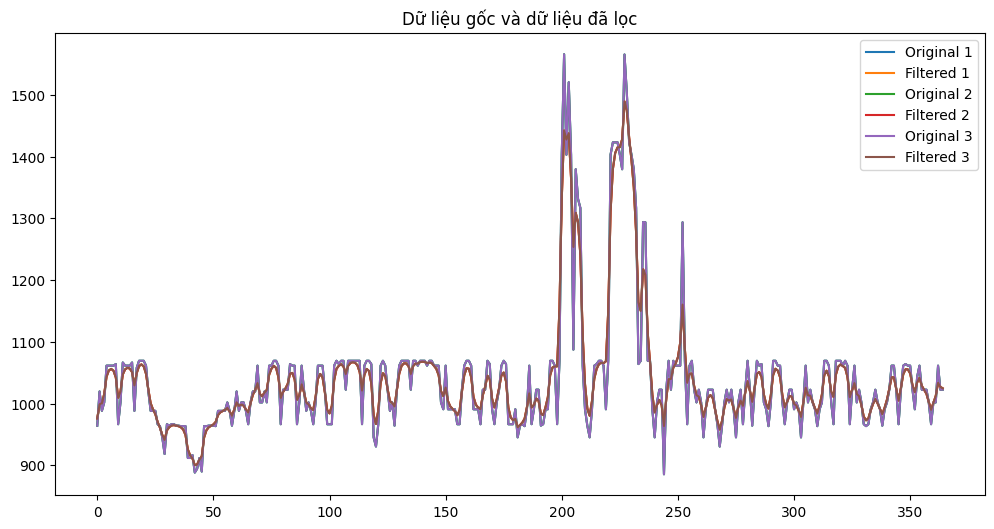

In [115]:
measurements = data.values
kf = KalmanFilter(initial_state_mean=measurements[0], n_dim_obs=measurements.shape[1])
state_means, state_covariances = kf.smooth(measurements)

filtered_data = pd.DataFrame(state_means, columns=[f'filtered_{i}' for i in range(1, measurements.shape[1] + 1)])
print(filtered_data.head())

plt.figure(figsize=(12, 6))
for i, column in enumerate(data.columns):
    plt.plot(data.index, data[column], label=f'Original {column}')
    plt.plot(data.index, filtered_data[f'filtered_{i+1}'], label=f'Filtered {column}')
plt.legend()
plt.title('Dữ liệu gốc và dữ liệu đã lọc')
plt.show()

## HMM

In [116]:
data2=df[['1', '2', '3']]

In [117]:
# Khởi tạo HMM
model = hmm.GaussianHMM(n_components=2, covariance_type="full", n_iter=1000)

# Huấn luyện HMM với dữ liệu quan sát
model.fit(data2)

# In ra các tham số của mô hình sau khi huấn luyện
print("Start probabilities: ", model.startprob_)
print("Transition matrix: ", model.transmat_)
print("Means: ", model.means_)
print("Covariances: ", model.covars_)



Start probabilities:  [4.13254459e-10 1.00000000e+00]
Transition matrix:  [[4.13944875e-12 1.00000000e+00]
 [2.24759624e-02 9.77524038e-01]]
Means:  [[ 966.037595    966.11258178  966.037595  ]
 [1041.89189429 1041.89189429 1041.89189429]]
Covariances:  [[[1.42595303e+00 1.40688677e+00 1.42470325e+00]
  [1.40688677e+00 1.39219572e+00 1.40813655e+00]
  [1.42470325e+00 1.40813655e+00 1.42595303e+00]]

 [[1.11465070e+04 1.11465070e+04 1.11465070e+04]
  [1.11465070e+04 1.11465070e+04 1.11465070e+04]
  [1.11465070e+04 1.11465070e+04 1.11465070e+04]]]


In [118]:
# Dự đoán trạng thái ẩn cho các quan sát hiện có
hidden_states = model.predict(data2)
print("Hidden states: ", hidden_states)

# Lấy mẫu mới từ mô hình đã huấn luyện
X, Z = model.sample(5)  # Lấy mẫu 5 quan sát mới
print("Sampled observations: ", X)
print("Sampled hidden states: ", Z)

Hidden states:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]
Sampled observations:  [[ 921.36817295  921.36817654  921.36817654]
 [1048.45120184 1048.45120109 1048.45120109]
 [ 958.38329485  958.3832948   958.3832948 ]
 [1021.30618457 1021.30618429 1021.30618429]
 [ 996.01675839  996.0167574   996.01675

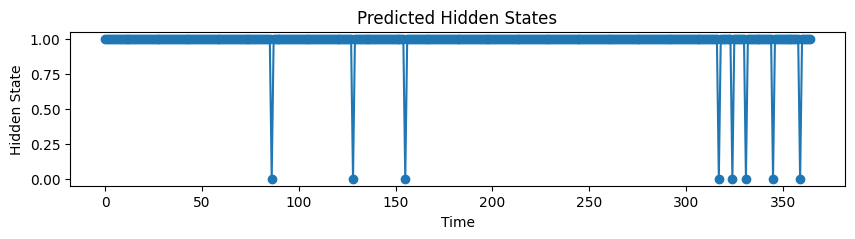

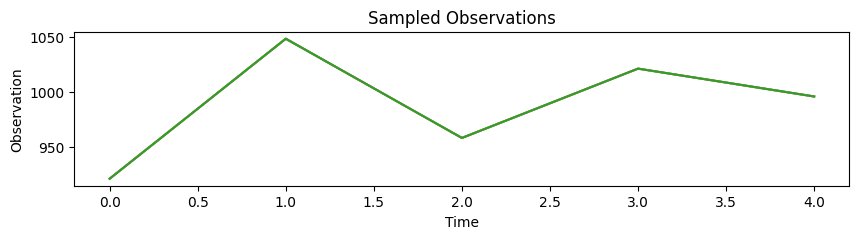

In [119]:
# Vẽ các trạng thái ẩn dự đoán
def plot_hidden_states(hidden_states, title):
    plt.figure(figsize=(10, 2))
    plt.plot(hidden_states, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Hidden State")
    plt.show()

plot_hidden_states(hidden_states, "Predicted Hidden States")

# Vẽ các quan sát mẫu
def plot_observations(observations, title):
    plt.figure(figsize=(10, 2)) 
    plt.plot(observations)
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Observation")
    plt.show()

plot_observations(X, "Sampled Observations")

In [120]:
df2 = pd.DataFrame(df[feats])
df2.head()

,Ngày,1,2,3
0,01/01/2021,964.4,964.4,964.4
1,01/02/2021,1019.7,1019.7,1019.7
2,01/03/2021,988.4,988.4,988.4
3,01/04/2021,1002.0,1002.0,1002.0
4,01/05/2021,1061.5,1061.5,1061.5


In [121]:
# Chuẩn hóa ma trận chuyển tiếp
def normalize_transition_matrix(transition_matrix):
    return transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Định nghĩa hàm markov_chain
def markov_chain(transmat, state, state_names, samples):
    (rows, cols) = transmat.shape 
    rvs = [] 
    values = list(np.arange(0, rows))

    # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
    for r in range(rows): 
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    states = [] 
    for n in range(samples): 
        state = rvs[state].rvs(size=1)[0]    
        states.append(state_names[state])
    return states

def compute_transition_matrix(df2):
    weather_states = []
    for column in df2.columns[1:]:
        for i in range(len(df2[column])-1):
            if df2[column][i] < df2[column][i+1]:
                weather_states.append('S')  # Nắng
            else:
                weather_states.append('C')  # Mây

    transition_counts = {'S': {'S': 0, 'C': 0}, 'C': {'S': 0, 'C': 0}}
    for i in range(len(weather_states)-1):
        from_state = weather_states[i]
        to_state = weather_states[i+1]
        transition_counts[from_state][to_state] += 1

    transition_matrix = np.zeros((2, 2))
    for i, from_state in enumerate(['S', 'C']):
        for j, to_state in enumerate(['S', 'C']):
            transition_matrix[i, j] = transition_counts[from_state][to_state] / weather_states.count(from_state)

    return transition_matrix

# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
transmat = compute_transition_matrix(df2)
transmat = normalize_transition_matrix(transmat)  # Chuẩn hóa ma trận chuyển tiếp

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)


['C', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'S', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'S', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'S',

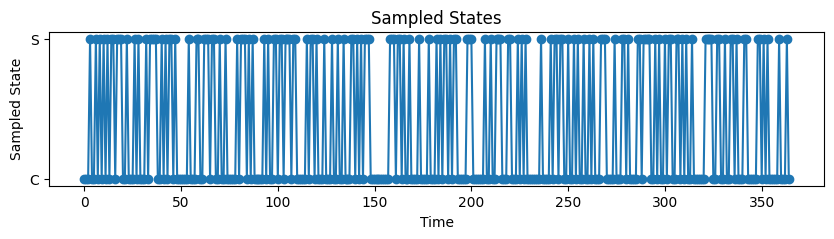

In [122]:
# Hàm vẽ biểu đồ cho dữ liệu mẫu dự đoán
def plot_samples(samples, title):
    plt.figure(figsize=(10, 2))
    plt.plot(samples, marker='o')
    plt.title(title)
    plt.xlabel("Time")
    plt.ylabel("Sampled State")
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_samples(samples, "Sampled States")

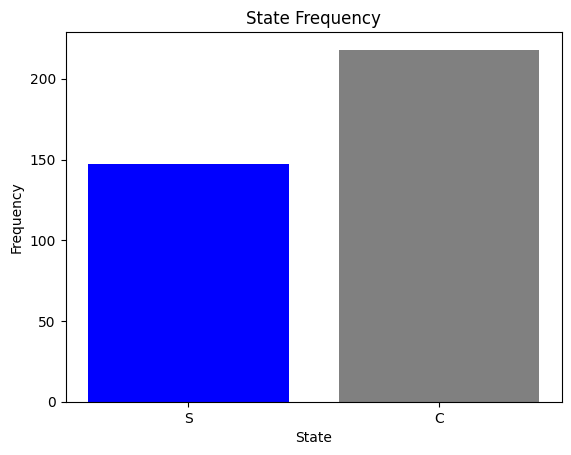

In [123]:
# Hàm vẽ biểu đồ cho dữ liệu samples
def plot_samples(samples):
    # Đếm số lần xuất hiện của mỗi trạng thái
    counts = {'S': 0, 'C': 0}
    for sample in samples:
        counts[sample] += 1

    # Vẽ biểu đồ cột
    plt.bar(counts.keys(), counts.values(), color=['blue', 'grey'])
    plt.xlabel('State')
    plt.ylabel('Frequency')
    plt.title('State Frequency')
    plt.show()

# Gọi hàm để vẽ biểu đồ
plot_samples(samples)

### Mamba theo trung bình trượt

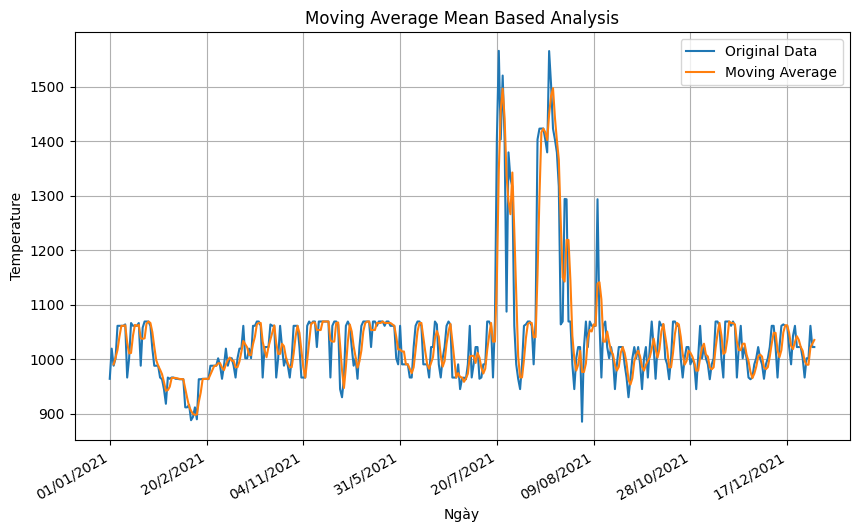

In [124]:


# Chọn cột dữ liệu để phân tích
column_name = '1'
# Áp dụng moving average
window_size = 3  # Kích thước cửa sổ moving average
df2['moving_average'] = df2[column_name].rolling(window=window_size).mean()

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(df2['Ngày'], df2[column_name], label='Original Data')
plt.plot(df2['Ngày'], df2['moving_average'], label='Moving Average')
plt.xlabel('Ngày')
plt.ylabel('Temperature')
plt.title('Moving Average Mean Based Analysis')
plt.legend()
plt.xticks(rotation=45)
# Hoặc giảm số lượng nhãn trục x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Định dạng lại các nhãn trục x
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

# Manba Stock

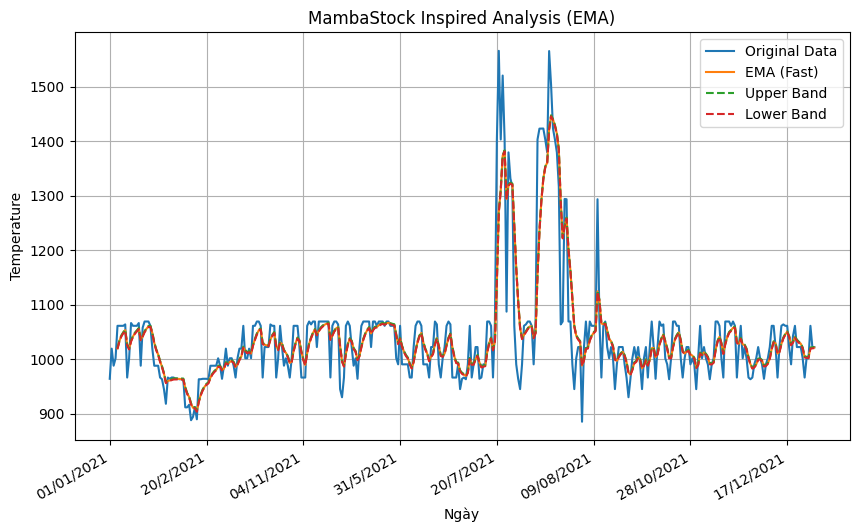

In [125]:
# Focus on a potentially volatile column (assuming '14' represents a volatile metric)
column_name = '1'

# Shorter window size for faster trend capture (be cautious with very small windows)
window_size = 5  # Experiment with different window sizes

# Calculate moving average with a twist:
# Instead of simple mean, calculate Exponential Moving Average (EMA) for faster reaction
df2['ema'] = df2[column_name].ewm(alpha=0.3, min_periods=window_size).mean()  # EMA with alpha for responsiveness

# Plot with additional lines for potential entry/exit signals (These are placeholders, actual signals might require more complex logic)
plt.figure(figsize=(10, 6))
plt.plot(df2['Ngày'], df2[column_name], label='Original Data')
plt.plot(df2['Ngày'], df2['ema'], label='EMA (Fast)')

# Add placeholder lines for potential entry/exit signals (replace with your strategy)
upper_band = df2['ema'] + 1  # Placeholder for a possible buy signal
lower_band = df2['ema'] - 1  # Placeholder for a possible sell signal
plt.plot(df2['Ngày'], upper_band, label='Upper Band', linestyle='--')
plt.plot(df2['Ngày'], lower_band, label='Lower Band', linestyle='--')

plt.xlabel('Ngày')
plt.ylabel('Temperature')  # Replace 'Temperature' with the actual metric name
plt.title('MambaStock Inspired Analysis (EMA)')
plt.legend()
plt.xticks(rotation=45)
# Hoặc giảm số lượng nhãn trục x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Định dạng lại các nhãn trục x
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()


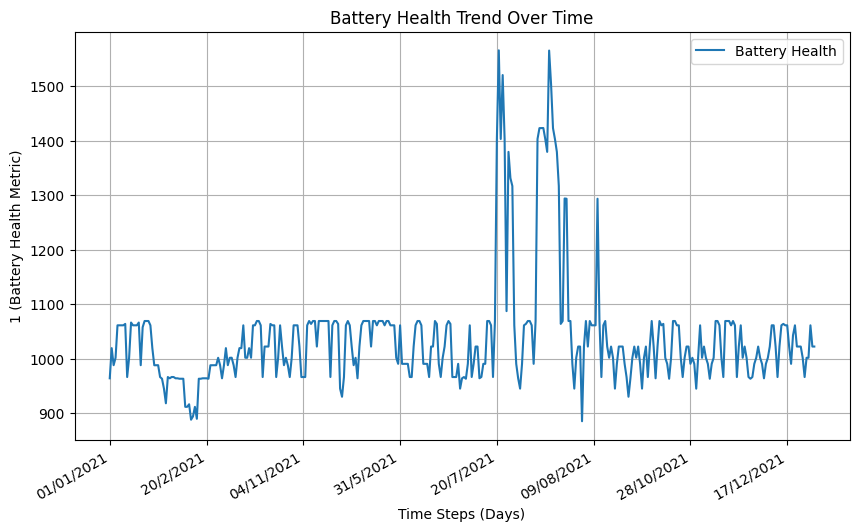

Estimated Degradation Rate: 0.15945205479452068


In [126]:
# Assuming 'day' represents time steps and '14' represents a battery health metric
column_name = '1'

# Calculate State of Health (SOH) degradation rate (example)
# This is a simplified example, consult MambaLithium research for more advanced methods
degradation_rate = (df2[column_name].iloc[-1] - df2[column_name].iloc[0]) / len(df2)

# Plot the battery health metric over time
plt.figure(figsize=(10, 6))
plt.plot(df2['Ngày'], df2[column_name], label='Battery Health')
plt.xlabel('Time Steps (Days)')  # Modify label if 'Ngày' represents different units
plt.ylabel(f'{column_name} (Battery Health Metric)')  # Replace with actual metric name
plt.title('Battery Health Trend Over Time')
plt.legend()
plt.xticks(rotation=45)
# Hoặc giảm số lượng nhãn trục x
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))

# Định dạng lại các nhãn trục x
plt.gcf().autofmt_xdate()
plt.grid(True)
plt.show()

# Print the degradation rate (example)
print(f"Estimated Degradation Rate: {degradation_rate}")


Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1706  
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0815 
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0811 
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8558 
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9170 
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8312 
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6976 
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7226 
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6390 
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5720 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


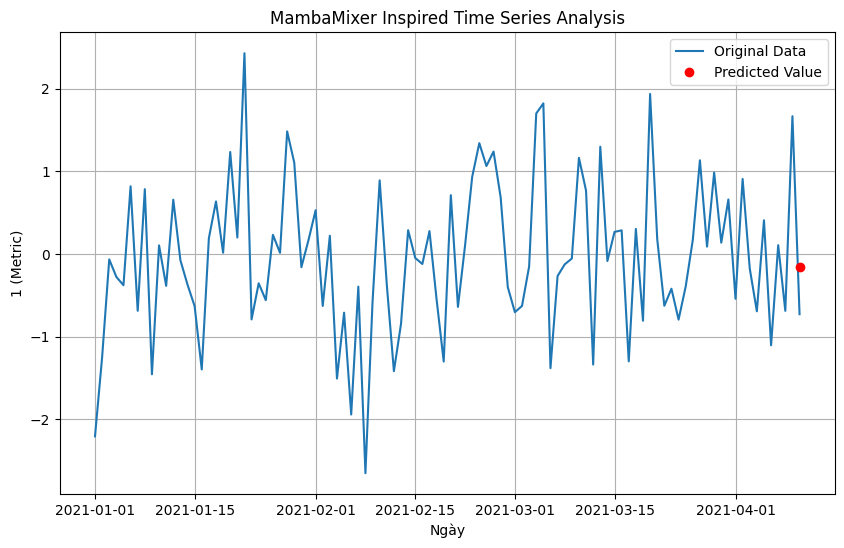

In [127]:
# Import libraries (assuming you have TensorFlow installed)
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Giả sử df2 là DataFrame chứa dữ liệu của bạn
df2 = pd.DataFrame({
    'Ngày': pd.date_range(start='1/1/2021', periods=100),
    '1': np.random.randn(100)
})

column_name = '1'

# Preprocess data (essential for machine learning models)
# This is a placeholder, adapt it to your specific data
df2_scaled = (df2[column_name] - df2[column_name].mean()) / df2[column_name].std()
df2_scaled = df2_scaled.values.reshape(-1, 1)

# Define a simple MambaMixer-inspired model (placeholder)
# This is a very basic example, consult MambaMixer research for actual architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(1,)),  # First hidden layer with ReLU activation
    tf.keras.layers.Dense(8, activation='relu'),  # Second hidden layer with ReLU activation
    tf.keras.layers.Dense(1)  # Output layer
])

# Compile the model (placeholder, loss function and optimizer might need adjustments)
model.compile(loss='mse', optimizer='adam')

# Train the model (placeholder, adjust epochs and batch size)
model.fit(df2_scaled, df2[column_name].values, epochs=10, batch_size=32)

# Prediction (placeholder, replace with actual prediction logic)
# This predicts the next value in the time series, you might need more data for predictions
predicted_value = model.predict(df2_scaled[-1].reshape(-1, 1))

# Plot (original data and predicted value)
plt.figure(figsize=(10, 6))
plt.plot(df2['Ngày'], df2[column_name], label='Original Data')
plt.plot([df2['Ngày'].iloc[-1]], predicted_value.flatten(), 'ro', label='Predicted Value')  # Plot predicted value at the last timestep
plt.xlabel('Ngày')
plt.ylabel(f'{column_name} (Metric)')  # Replace with actual metric name
plt.title('MambaMixer Inspired Time Series Analysis')
plt.legend()
plt.grid(True)
plt.show()


In [128]:
import numpy as np
import scipy.stats as stats

def compute_transition_matrix(df):
    # Ví dụ giả định về cách tính toán ma trận chuyển tiếp từ DataFrame df
    # Thay thế bằng logic cụ thể của bạn
    transmat = np.array([
        [0.7, 0.3],
        [0.4, 0.6]
    ])
    return transmat

def markov_chain(transmat, start_state, states, n):
    rows, _ = transmat.shape
    values = np.arange(len(states))
    rvs = []

    # Chuẩn hóa ma trận chuyển tiếp
    transmat = transmat / transmat.sum(axis=1)[:, None]

    # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
    for r in range(rows):
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    current_state = start_state
    samples = [states[current_state]]
    for _ in range(n - 1):
        current_state = rvs[current_state].rvs()
        samples.append(states[current_state])
    
    return samples

# Ví dụ sử dụng hàm compute_transition_matrix và markov_chain
df = pd.DataFrame()  # Giả sử df là DataFrame chứa dữ liệu của bạn
transmat = compute_transition_matrix(df)

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)


['S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'C', 'C', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S',

In [129]:
import numpy as np
import scipy.stats as stats
import pandas as pd

def compute_transition_matrix(df):
    # Ví dụ giả định về cách tính toán ma trận chuyển tiếp từ DataFrame df
    # Thay thế bằng logic cụ thể của bạn
    transmat = np.array([
        [0.7, 0.3],
        [0.4, 0.6]
    ])
    return transmat

def markov_chain(transmat, start_state, state_names, samples):
    rows, _ = transmat.shape
    values = np.arange(len(state_names))
    rvs = []

    # Chuẩn hóa ma trận chuyển tiếp
    transmat = transmat / transmat.sum(axis=1)[:, None]

    # Tạo các biến ngẫu nhiên cho mỗi hàng của ma trận chuyển tiếp
    for r in range(rows):
        rv = stats.rv_discrete(name="row" + str(r), values=(values, transmat[r]))
        rvs.append(rv)

    # Bắt đầu từ trạng thái ban đầu và sau đó lấy mẫu biến ngẫu nhiên phù hợp
    # dựa trên trạng thái theo sau các chuyển tiếp
    current_state = start_state
    states = [state_names[current_state]]
    for _ in range(samples - 1):
        current_state = rvs[current_state].rvs()
        states.append(state_names[current_state])
    
    return states

# Ví dụ sử dụng hàm compute_transition_matrix và markov_chain
df = pd.DataFrame()  # Giả sử df là DataFrame chứa dữ liệu của bạn
transmat = compute_transition_matrix(df)

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)


['S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'C', 'C', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'C', 'S', 'S', 'C', 'C', 'S', 'S',

In [130]:
# Tính toán ma trận chuyển tiếp từ dữ liệu thời tiết
transmat = compute_transition_matrix(df2)

# Gọi hàm markov_chain để tạo mẫu dữ liệu thời tiết dựa trên ma trận chuyển tiếp
samples = markov_chain(transmat, 0, ['S', 'C'], 365)

# In ra mẫu dữ liệu thời tiết
print(samples)

['S', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'S', 'C', 'S', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'S', 'C', 'C', 'C', 'C', 'S', 'S', 'C', 'S',